In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('LLCP2022_filtered.csv')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score



In [45]:
y = data['has_diabetes']
x = data.drop('has_diabetes', axis=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = data['has_diabetes'] )

In [10]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

y_predict = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_predict))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))

Accuracy: 0.8445090024659663
Precision: 0.8016696454376008
Recall: 0.8445090024659663
F1 score: 0.8157471669778459


In [35]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

print('Accuracy ', model.score(X_test,Y_test))
print("Precision:", precision_score(Y_test, model.predict(X_test), average="weighted")) 
print('Recall:', recall_score(Y_test, model.predict(X_test), average="weighted"))
print('F1 score:', f1_score(Y_test, model.predict(X_test), average="weighted"))

Accuracy  0.865295184046662
Precision: 0.8317157610459446
Recall: 0.865295184046662
F1 score: 0.8165556723896837


In [7]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, Y_train)
# CategoricalNB()

y_predicted = clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_predicted))

print("Precision:", precision_score(Y_test, y_predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predicted, average="weighted"))

Accuracy:  0.8510398720850364
Precision: 0.8188675725724193
Recall: 0.8510398720850364
F1 score: 0.8289191023623764


In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

predicted = model.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, predicted))

print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

Accuracy:  0.8091634856827574
Precision: 0.7968721531341592
Recall: 0.8091634856827574
F1 score: 0.8026936738753133


[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.862272 -> initscore=1.834289
[LightGBM] [Info] Start training from score 1.834289
Accuracy  0.8652501435665304


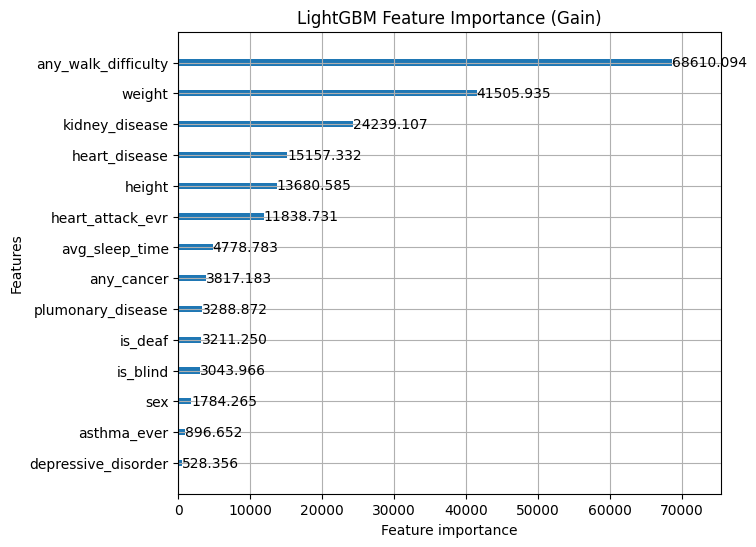

In [12]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(learning_rate=0.1,max_depth=-5,random_state=42)
lgb_model.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

print('Accuracy ', lgb_model.score(X_test,Y_test))

import matplotlib.pyplot as plt
lgb.plot_importance(lgb_model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

Accuracy:  0.8096364107241383


<Axes: title={'center': ' Decision Tree Classifier Feature Importance'}>

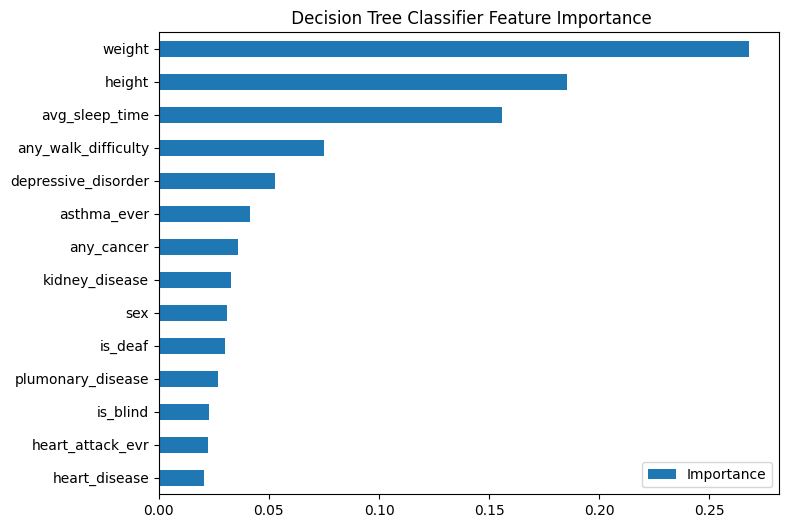

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

predicted = model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, predicted))
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6), title=' Decision Tree Classifier Feature Importance')

More experiments with changed variables

In [8]:
negative = data["has_diabetes"].value_counts()[2] 
positive = data["has_diabetes"].value_counts()[1]
total = data["has_diabetes"].count()

print("total: ", total)
print("has diabetes: ", positive)
print("dos not have dibaetes: ", negative)

total:  444045
has diabetes:  61158
dos not have dibaetes:  382887


### 1- add class weights

In [9]:
weight_for_1 = (1 / positive) * (total / 2.0)
weight_for_2 = (1 / negative) * (total / 2.0)

class_weights = {1: weight_for_1, 2: weight_for_2}
class_weights

{1: 3.6303100166781124, 2: 0.5798642941651192}

In [10]:
model_rf = RandomForestClassifier(class_weight=class_weights)
model_rf.fit(X_train, Y_train)

y_predict = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_predict))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))

Accuracy: 0.8010899796191827
Precision: 0.7862606785469837
Recall: 0.8010899796191827
F1 score: 0.7932947651362213


In [14]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42,class_weight='balanced')
model_lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

y_predict = model_lgb.predict(X_test)

print('Accuracy ', model_lgb.score(X_test,Y_test))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))

[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy  0.7024175477710592
Precision: 0.8358662031056091
Recall: 0.7024175477710592
F1 score: 0.745577282309749


In [17]:
model_dt = DecisionTreeClassifier(class_weight=class_weights)
model_dt.fit(X_train,Y_train)

y_predict = model_dt.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, y_predict))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))

Accuracy:  0.7478070916235967
Precision: 0.7877140512679279
Recall: 0.7478070916235967
F1 score: 0.7657120912017042


### Feature selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array

select = SelectKBest(score_func=chi2, k=5)
z = select.fit_transform(x,y)
 
print("After selecting best 5 features:", z.shape) 

filter = select.get_support()
features = array(x.columns)
 
print("Selected best 5:")
print(features[filter])

After selecting best 5 features: (444045, 5)
Selected best 5:
['weight' 'height' 'is_deaf' 'is_blind' 'any_walk_difficulty']


In [20]:
y = data['has_diabetes']
# x = data.drop('has_diabetes', axis=1)
x = data[features[filter]]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = data['has_diabetes'] )

In [22]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

y_predict = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_predict))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))


Accuracy: 0.8543503473747031
Precision: 0.7976897749210853
Recall: 0.8543503473747031
F1 score: 0.8100215947524074


In [23]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

y_predict = model_lgb.predict(X_test)
print('Accuracy ', model_lgb.score(X_test,Y_test))
print("Precision:", precision_score(Y_test, y_predict, average="weighted")) 
print('Recall:', recall_score(Y_test, y_predict, average="weighted"))
print('F1 score:', f1_score(Y_test, y_predict, average="weighted"))

[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.862272 -> initscore=1.834289
[LightGBM] [Info] Start training from score 1.834289
Accuracy  0.8625477147586393
Precision: 0.8230530640143289
Recall: 0.8625477147586393
F1 score: 0.8007548443179083


In [24]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

predicted = model_dt.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

Accuracy:  0.849677397561058
Precision: 0.7961605676324881
Recall: 0.849677397561058
F1 score: 0.8110681971175353


## best 10 feature selection

In [41]:
y = data['has_diabetes']
x = data.drop('has_diabetes', axis=1)

select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(x,y)

filter = select.get_support()
features = array(x.columns)

print("Selected best 10:")
print(features[filter])

x = data[features[filter]]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = data['has_diabetes'] )

Selected best 10:
['heart_attack_evr' 'asthma_ever' 'any_cancer' 'plumonary_disease'
 'kidney_disease' 'weight' 'height' 'is_deaf' 'is_blind'
 'any_walk_difficulty']


In [28]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
predicted = model_rf.predict(X_test)
print("RF accuracy:", accuracy_score(Y_test, predicted))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

RF accuracy: 0.8483712236372439
Precision: 0.804515441618346
Recall: 0.8483712236372439
F1 score: 0.8174963182026916


In [42]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

predicted = model_lgb.predict(X_test)

print('LGB accuracy ', model_lgb.score(X_test,Y_test))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.862272 -> initscore=1.834289
[LightGBM] [Info] Start training from score 1.834289
LGB accuracy  0.8647659584051166
Precision: 0.8302409150212685
Recall: 0.8647659584051166
F1 score: 0.8140892796708309


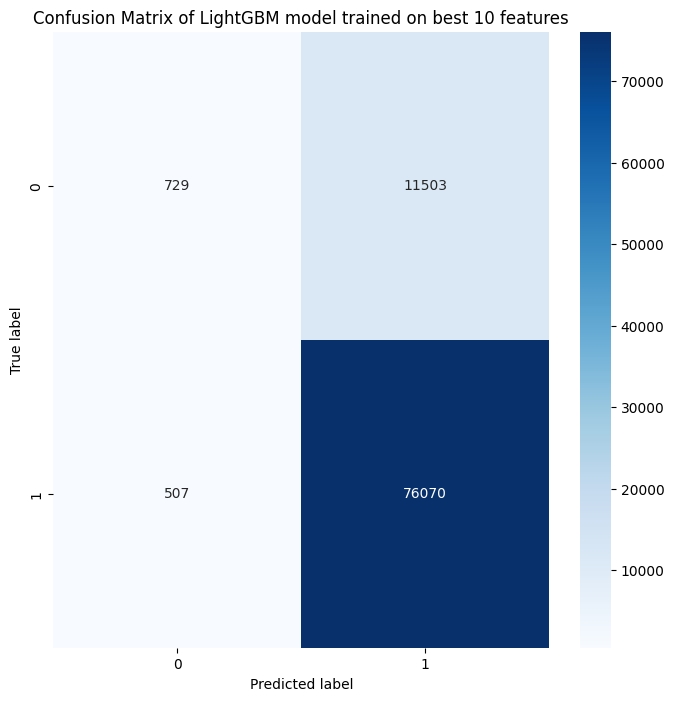

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predicted)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of LightGBM model trained on best 10 features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

predicted = model_dt.predict(X_test)
print("DT accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

DT accuracy:  0.8352644439189721
Precision: 0.8020535989973595
Recall: 0.8352644439189721
F1 score: 0.815029995116263


#### select manually the first 5 features with highest importance in Decision Tree Classifier model

In [37]:
y = data['has_diabetes']
x = data.drop('has_diabetes', axis=1)

filter = ["weight", 'height', 'avg_sleep_time', 'any_walk_difficulty','depressive_disorder']
print("first 5 features with highest importance in Decision Tree Classifier")
print(filter)

x = x[filter]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = data['has_diabetes'] )

first 5 features with highest importance in Decision Tree Classifier
['weight', 'height', 'avg_sleep_time', 'any_walk_difficulty', 'depressive_disorder']


In [38]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
predicted = model_rf.predict(X_test)
print("RF accuracy:", accuracy_score(Y_test, predicted))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

RF accuracy: 0.8481910617167179
Precision: 0.7942084076522415
Recall: 0.8481910617167179
F1 score: 0.8101123637424954


In [39]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

predicted = model_lgb.predict(X_test)

print('LGB accuracy ', model_lgb.score(X_test,Y_test))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.862272 -> initscore=1.834289
[LightGBM] [Info] Start training from score 1.834289
LGB accuracy  0.8623225123579817
Precision: 0.8170309888023454
Recall: 0.8623225123579817
F1 score: 0.7994281185757592


In [40]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

predicted = model_dt.predict(X_test)
print("DT accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:", precision_score(Y_test, predicted, average="weighted")) 
print('Recall:', recall_score(Y_test, predicted, average="weighted"))
print('F1 score:', f1_score(Y_test, predicted, average="weighted"))

DT accuracy:  0.8347352182774268
Precision: 0.7928814748900751
Recall: 0.8347352182774268
F1 score: 0.808858833301645


### Save the model with best 5 features

In [16]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

data = pd.read_csv('LLCP2022_filtered.csv')
y = data['has_diabetes']
x = data.drop('has_diabetes', axis=1)

filter = ["weight", 'height', 'avg_sleep_time', 'any_walk_difficulty','depressive_disorder']
x = x[filter]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = data['has_diabetes'] )

In [21]:
print(Y_train)

143817    2.0
294921    1.0
102270    2.0
413494    2.0
255670    2.0
         ... 
421974    2.0
199830    2.0
223511    2.0
430240    1.0
331411    1.0
Name: has_diabetes, Length: 355236, dtype: float64


In [19]:
print(X_train)

             weight   height  avg_sleep_time  any_walk_difficulty  \
143817    41.149140   157.48             7.0                  1.0   
294921    45.881292   167.64             4.0                  2.0   
102270    26.746941   152.40             7.0                  2.0   
413494    45.264055   187.96             2.0                  2.0   
255670    25.718213   167.64             7.0                  2.0   
...             ...      ...             ...                  ...   
421974  7777.000000  7777.00             7.0                  7.0   
199830    43.206598   170.18             6.0                  1.0   
223511    52.259408   175.26             5.0                  1.0   
430240    30.861855   152.40             6.0                  2.0   
331411    30.450364   154.94             8.0                  2.0   

        depressive_disorder  
143817                  1.0  
294921                  2.0  
102270                  2.0  
413494                  1.0  
255670               

In [22]:
import lightgbm as lgb
import numpy as np

model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],eval_metric='logloss')

y_predict = model_lgb.predict(X_test)
print('Accuracy ', model_lgb.score(X_test,Y_test))
print(model_lgb.predict(np.array([[41.149140, 157.48, 7.0, 1.0, 1.0]])))
print(model_lgb.predict(np.array([[45.881292, 167.64, 4.0, 2.0, 2.0]])))
print(model_lgb.predict(np.array([[30.861855, 152.40, 6.0, 2.0, 2.0]])))
print(model_lgb.predict(np.array([[30.450364, 154.94, 8.0, 2.0, 1.0]])))

pickle.dump(model_lgb, open('model.pkl','wb'))

[LightGBM] [Info] Number of positive: 306310, number of negative: 48926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 355236, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.862272 -> initscore=1.834289
[LightGBM] [Info] Start training from score 1.834289
Accuracy  0.8623225123579817
[2.]
[2.]
[2.]
[2.]
